<a href="https://colab.research.google.com/github/BibikaShrestha/AI-Worksheets/blob/main/AIWorksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Worksheet-04

In [2]:

from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import io

# Upload the file from your computer
uploaded = files.upload()

# Load the uploaded file
df = pd.read_csv(io.BytesIO(uploaded['diabetes_.csv']))

Saving diabetes_.csv to diabetes_.csv


Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).
2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.
3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.
4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [12]:


# 1. Load the Dataset
df = pd.read_csv('diabetes_.csv')
print("First few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nSummary statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

# 2. Handle Missing Data
df_clean = df.copy()
medical_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN for medical measurements
for col in medical_cols:
    df_clean[col] = df_clean[col].replace(0, np.nan)

# Apply worksheet rule: >10% missing → fill with mean, ≤10% → drop rows
missing_pct = (df_clean.isnull().sum() / len(df_clean)) * 100

for col in medical_cols:
    if missing_pct[col] > 10:
        df_clean[col].fillna(df_clean[col].mean(), inplace=True)
    else:
        df_clean = df_clean.dropna(subset=[col])

print(f"\nShape after cleaning: {df_clean.shape}")

# 3. Feature Engineering
X = df_clean.drop('Outcome', axis=1).values
y = df_clean['Outcome'].values

# Train-test split from scratch (70-30)
def train_test_split_scratch(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    split_idx = int(len(X) * (1 - test_size))
    X_train = X[indices[:split_idx]]
    X_test = X[indices[split_idx:]]
    y_train = y[indices[:split_idx]]
    y_test = y[indices[split_idx:]]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)
print(f"\nTraining set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

# 4. Implement KNN from scratch
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_labels = y_train[sorted_indices[:k]]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100

# Evaluate performance
predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)
print(f"\nAccuracy: {accuracy:.2f}%")

First few rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                   

/tmp/ipython-input-3254192505.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mean(), inplace=True)



Accuracy: 69.72%


Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.
2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

In [16]:
 #1. Repeat Classification Task with scaled data
def scale_features(X_train, X_test):
    """Scale features using standardization."""
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    # Handle division by zero
    std[std == 0] = 1
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scale_features(X_train, X_test)

predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)
accuracy_scaled = compute_accuracy(y_test, predictions_scaled)

# 2. Comparative Analysis
print(f"Accuracy original: {accuracy:.2f}%")
print(f"Accuracy scaled:   {accuracy_scaled:.2f}%")

print("\nScaling impact: Normalizes feature ranges")
print("Reason: k-NN is distance-based, so all features should have equal weight")

Accuracy original: 69.72%
Accuracy scaled:   70.64%

Scaling impact: Normalizes feature ranges
Reason: k-NN is distance-based, so all features should have equal weight


Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:
– Accuracy.
– Time taken to make predictions.
2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.
3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

Running KNN for k = 1 to 15:
k= 1: Accuracy=69.72%/65.60%, Time=0.7416s/0.7398s
k= 2: Accuracy=67.43%/68.35%, Time=0.7427s/0.8265s
k= 3: Accuracy=69.72%/70.64%, Time=1.2846s/1.2205s
k= 4: Accuracy=70.64%/72.02%, Time=0.7234s/0.9488s
k= 5: Accuracy=74.31%/72.48%, Time=0.7758s/0.7521s
k= 6: Accuracy=73.85%/72.48%, Time=0.7183s/0.7367s
k= 7: Accuracy=74.77%/73.39%, Time=0.7539s/0.7324s
k= 8: Accuracy=72.48%/74.31%, Time=0.7309s/0.7378s
k= 9: Accuracy=72.48%/73.85%, Time=0.7484s/0.7158s
k=10: Accuracy=72.02%/75.23%, Time=0.7585s/1.2222s
k=11: Accuracy=74.77%/74.77%, Time=1.3495s/1.4251s
k=12: Accuracy=74.31%/74.77%, Time=1.2866s/0.7979s
k=13: Accuracy=75.23%/75.23%, Time=0.7362s/0.7517s
k=14: Accuracy=72.94%/72.94%, Time=0.7592s/0.7545s
k=15: Accuracy=73.85%/75.69%, Time=0.7400s/0.7529s


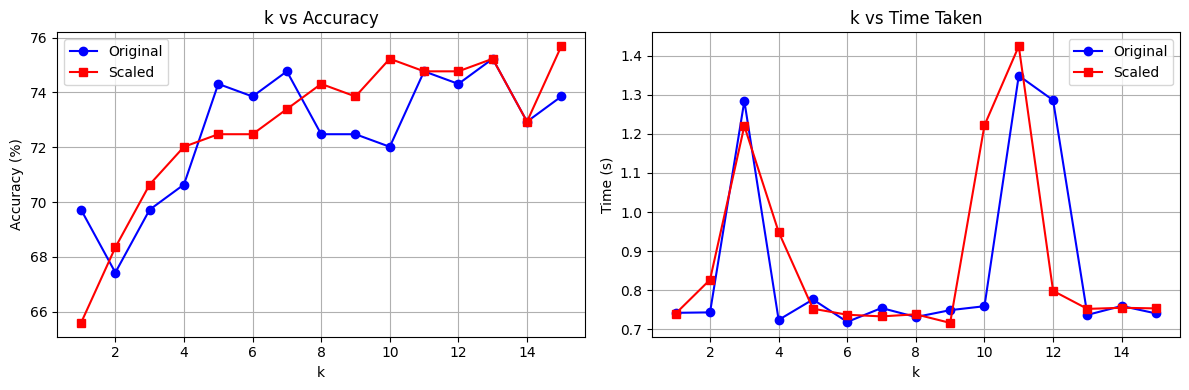


Analysis:
- Small k (1-3): Higher variance, sensitive to noise
- Large k (11-15): Smoother decision boundaries, more bias
- Time increases slightly with k due to more neighbor comparisons
- Optimal k based on scaled data: k=15


In [18]:

# 1. Varying the number of neighbors k
k_values = list(range(1, 16))
accuracies_original = []
accuracies_scaled = []
times_original = []
times_scaled = []

print("Running KNN for k = 1 to 15:")
for k in k_values:
    # Original dataset
    start = time.time()
    pred_orig = knn_predict(X_test, X_train, y_train, k=k)
    time_orig = time.time() - start
    acc_orig = compute_accuracy(y_test, pred_orig)

    # Scaled dataset
    start = time.time()
    pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=k)
    time_scaled = time.time() - start
    acc_scaled = compute_accuracy(y_test, pred_scaled)

    accuracies_original.append(acc_orig)
    accuracies_scaled.append(acc_scaled)
    times_original.append(time_orig)
    times_scaled.append(time_scaled)

    print(f"k={k:2d}: Accuracy={acc_orig:5.2f}%/{acc_scaled:5.2f}%, Time={time_orig:.4f}s/{time_scaled:.4f}s")

# 2. Visualize Results
plt.figure(figsize=(12, 4))

# k vs Accuracy
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies_original, 'b-o', label='Original')
plt.plot(k_values, accuracies_scaled, 'r-s', label='Scaled')
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.title('k vs Accuracy')
plt.grid(True)
plt.legend()

# k vs Time Taken
plt.subplot(1, 2, 2)
plt.plot(k_values, times_original, 'b-o', label='Original')
plt.plot(k_values, times_scaled, 'r-s', label='Scaled')
plt.xlabel('k')
plt.ylabel('Time (s)')
plt.title('k vs Time Taken')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 3. Analyze and Discuss
print("\nAnalysis:")
print(f"- Small k (1-3): Higher variance, sensitive to noise")
print(f"- Large k (11-15): Smoother decision boundaries, more bias")
print(f"- Time increases slightly with k due to more neighbor comparisons")
print(f"- Optimal k based on scaled data: k={k_values[np.argmax(accuracies_scaled)]}")